# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dice_ml
from dice_ml.utils import helpers 
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn import tree
from pydotplus import graph_from_dot_data

pd.set_option('display.max_columns', None)

# Importing the data

In [2]:
df = pd.read_csv("data/income-cleaned.csv")
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [46]:
type(df)

pandas.core.frame.DataFrame

Input variables:
 
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- hours-per-week: continuous.
- income: Whether income is over $50K

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15456 entries, 0 to 15455
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       15456 non-null  int64
 1   hours_per_week            15456 non-null  int64
 2   income                    15456 non-null  int64
 3   workclass_Other/Unknown   15456 non-null  int64
 4   workclass_Private         15456 non-null  int64
 5   workclass_Self-Employed   15456 non-null  int64
 6   marital_status_Married    15456 non-null  int64
 7   marital_status_Separated  15456 non-null  int64
 8   marital_status_Single     15456 non-null  int64
 9   marital_status_Widowed    15456 non-null  int64
 10  education_Bachelors       15456 non-null  int64
 11  education_Doctorate       15456 non-null  int64
 12  education_HS-grad         15456 non-null  int64
 13  education_Masters         15456 non-null  int64
 14  education_Prof-school     15456 non-nu

In [4]:
df.head()

age  hours_per_week  income  workclass_Other/Unknown  workclass_Private  \
0   27              50       1                        0                  1   
1   23              10       0                        0                  1   
2   43              50       0                        0                  0   
3   67              20       1                        1                  0   
4   55              40       1                        0                  1   

   workclass_Self-Employed  marital_status_Married  marital_status_Separated  \
0                        0                       0                         0   
1                        0                       0                         0   
2                        1                       1                         0   
3                        0                       1                         0   
4                        0                       1                         0   

   marital_status_Single  marital_status_Widowed  education_Bachelors  \
0                      1                       0                    0   
1                      1                       0                    0   
2                      0                       0                    0   
3                      0                       0                    0   
4                      0                       0                    0   

   education_Doctorate  education_HS-grad  education_Masters  \
0                    0                  1                  0   
1                    0                  0                  0   
2                    0                  1                  0   
3                    1                  0                  0   
4                    0                  0                  0   

   education_Prof-school  education_School  education_Some-college  \
0                      0                 0                       0   
1                      0                 0                       1   
2                      0                 0                       0   
3                      0                 0                       0   
4                      0                 0                       1   

   occupation_Other/Unknown  occupation_Professional  occupation_Sales  \
0                         0                        0                 1   
1                         0                        0                 0   
2                         0                        0                 0   
3                         1                        0                 0   
4                         0                        0                 0   

   occupation_Service  occupation_White-Collar  
0                   0                        0  
1                   0                        0  
2                   0                        0  
3                   0                        0  
4                   0                        0

# Decision Trees

- Supervised Machine Learning algorithm (classification)
- Graph/pathway → making decisions along the way

We continue going through the data splitting it up (partitions) based on the features

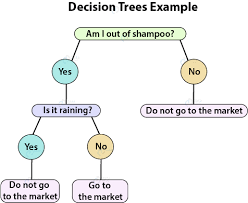

## Brief steps in constructing a decision tree

1. There are features and a target (what class the data point is)
2. Make a *decision* (a split) based on some *metric* using the features
    - data are split into partitions
3. Continue on each partition, and do more splits for each using the features in that partition
4. Keep doing that until a **stopping condition** is hit
    - Number of data points in a final partition
    - Layers deep
    
**Additional Resource**: [R2D3](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/): This is highly recommended for getting a visual introduction to decision trees. Excellent animations explaining the training and prediction stages shown above.

### Note regarding how the splits work

We make the most optimal split at each decision (greedy) decision which doesn't necessarily lead to the overall most optimal solution

## Code for building a decision tree

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [6]:
X = df.drop(columns=['income'], axis = 1)
y = df['income']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [8]:
dtree = DecisionTreeClassifier(class_weight = 'balanced', max_depth=7)

In [9]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7)

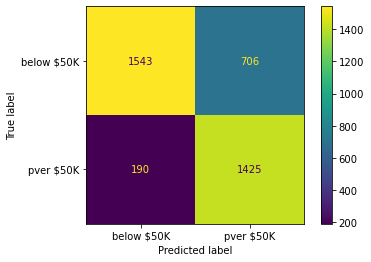

In [10]:
plot_confusion_matrix(dtree, X_test, y_test, display_labels= ['below $50K', 'pver $50K'])

# Interpreting the results

## Visualize the decision tree

In [11]:
# Create DOT data
dot_data = export_graphviz(dtree, out_file="dtree.dot", 
                           feature_names=X_train.columns,  
                           class_names=['Over $50k', 'Less than $50k'], 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
#graph = graph_from_dot_data(dot_data)  

# Show graph
#Image(graph.create_png())

from subprocess import call
call(['dot', '-Tpng', 'dtree.dot', '-o', 'dtree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'dtree.png')

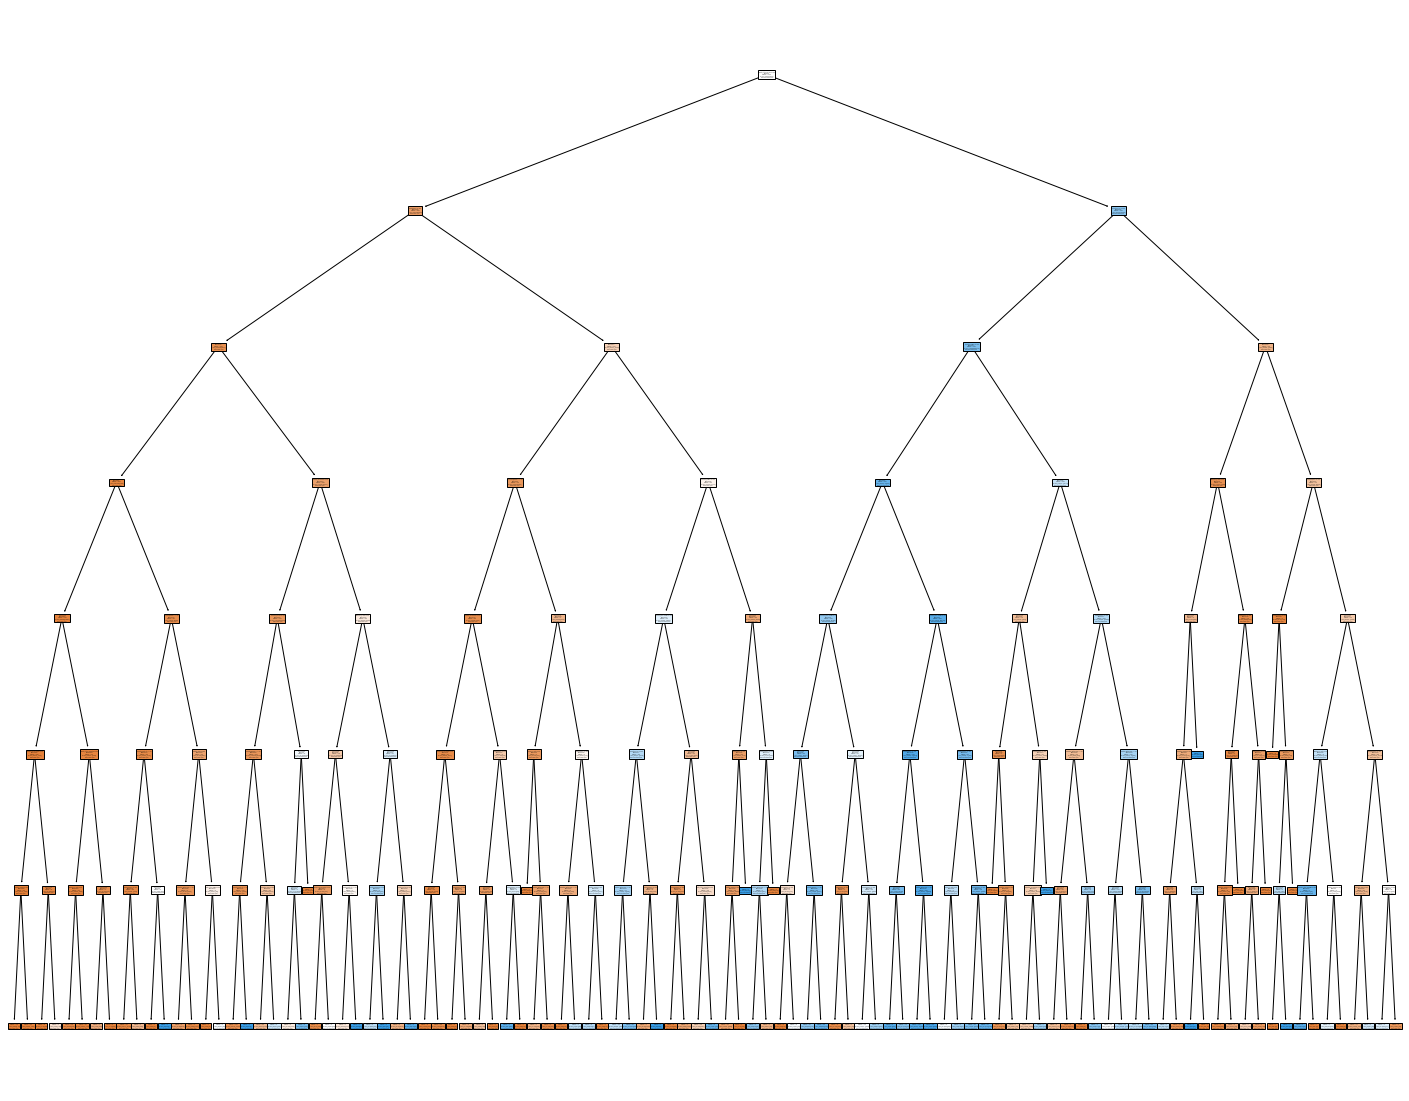

In [12]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=X_train.columns,  
                   class_names=['Over $50k', 'Less than $50k'],
                   filled=True)
plt.savefig('tree.png')
plt.show()

## Another way to visualize these trees

In [21]:
from interpret.glassbox import ClassificationTree
from interpret import show

In [23]:
dec_tree = ClassificationTree(max_depth=17)

In [24]:
dec_tree.fit(X_train, y_train)

In [25]:
dt_global = dec_tree.explain_global()
show(dt_global)

<!-- http://127.0.0.1:7918/140335099964768/ -->

In [27]:
dt_local = dec_tree.explain_local(X_test[:5], y_test[:5])
show(dt_local)

<!-- http://127.0.0.1:7918/140335059603312/ -->

## Lets see what it takes to change our results

In [13]:
d = dice_ml.Data(dataframe = df,
                 continuous_features = ["age", "hours_per_week"],
                 outcome_name = 'income')

m = dice_ml.Model(model=dtree, backend = "sklearn")

exp = dice_ml.Dice(d, m)

In [14]:
e2 = exp.generate_counterfactuals(X_train.iloc[0:10],
                                  total_CFs=2,
                                  desired_class="opposite",
                                  features_to_vary=['education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Prof-school', 'education_School',
       'education_Some-college']
                                  )
e2.visualize_as_dataframe(show_only_changes=True)

 70%|███████   | 7/10 [00:00<00:00, 11.38it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


100%|██████████| 10/10 [00:00<00:00, 11.27it/s]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Query instance (original outcome : 0)


age  hours_per_week  workclass_Other/Unknown  workclass_Private  \
0   42              38                        0                  0   

   workclass_Self-Employed  marital_status_Married  marital_status_Separated  \
0                        0                       0                         0   

   marital_status_Single  marital_status_Widowed  education_Bachelors  \
0                      0                       0                    0   

   education_Doctorate  education_HS-grad  education_Masters  \
0                    0                  0                  0   

   education_Prof-school  education_School  education_Some-college  \
0                      0                 0                       1   

   occupation_Other/Unknown  occupation_Professional  occupation_Sales  \
0                         0                        0                 0   

   occupation_Service  occupation_White-Collar  income  
0                   0                        1       0


Diverse Counterfactual set (new outcome: 1.0)


age hours_per_week workclass_Other/Unknown workclass_Private  \
0   -              -                       -                 -   
1   -              -                       -                 -   

  workclass_Self-Employed marital_status_Married marital_status_Separated  \
0                       -                      -                        -   
1                       -                      -                        -   

  marital_status_Single marital_status_Widowed education_Bachelors  \
0                     -                      -                   -   
1                     -                      -                   -   

  education_Doctorate education_HS-grad education_Masters  \
0                   1                 -                 -   
1                   1                 -                 -   

  education_Prof-school education_School education_Some-college  \
0                     -                -                      -   
1                     -                1                      -   

  occupation_Other/Unknown occupation_Professional occupation_Sales  \
0                        -                       -                -   
1                        -                       -                -   

  occupation_Service occupation_White-Collar income  
0                  -                       -      1  
1                  -                       -      1

Query instance (original outcome : 0)


age  hours_per_week  workclass_Other/Unknown  workclass_Private  \
0   64              15                        0                  0   

   workclass_Self-Employed  marital_status_Married  marital_status_Separated  \
0                        1                       1                         0   

   marital_status_Single  marital_status_Widowed  education_Bachelors  \
0                      0                       0                    0   

   education_Doctorate  education_HS-grad  education_Masters  \
0                    0                  1                  0   

   education_Prof-school  education_School  education_Some-college  \
0                      0                 0                       0   

   occupation_Other/Unknown  occupation_Professional  occupation_Sales  \
0                         0                        0                 1   

   occupation_Service  occupation_White-Collar  income  
0                   0                        0       0


Diverse Counterfactual set (new outcome: 1.0)


age hours_per_week workclass_Other/Unknown workclass_Private  \
0   -              -                       -                 -   
1   -              -                       -                 -   

  workclass_Self-Employed marital_status_Married marital_status_Separated  \
0                       -                      -                        -   
1                       -                      -                        -   

  marital_status_Single marital_status_Widowed education_Bachelors  \
0                     -                      -                   -   
1                     -                      -                   -   

  education_Doctorate education_HS-grad education_Masters  \
0                   -                 0                 -   
1                   -                 0                 1   

  education_Prof-school education_School education_Some-college  \
0                     -                -                      -   
1                     -                -                      -   

  occupation_Other/Unknown occupation_Professional occupation_Sales  \
0                        -                       -                -   
1                        -                       -                -   

  occupation_Service occupation_White-Collar income  
0                  -                       -      1  
1                  -                       -      1

Query instance (original outcome : 1)


age  hours_per_week  workclass_Other/Unknown  workclass_Private  \
0   42              44                        0                  1   

   workclass_Self-Employed  marital_status_Married  marital_status_Separated  \
0                        0                       1                         0   

   marital_status_Single  marital_status_Widowed  education_Bachelors  \
0                      0                       0                    1   

   education_Doctorate  education_HS-grad  education_Masters  \
0                    0                  0                  0   

   education_Prof-school  education_School  education_Some-college  \
0                      0                 0                       0   

   occupation_Other/Unknown  occupation_Professional  occupation_Sales  \
0                         0                        1                 0   

   occupation_Service  occupation_White-Collar  income  
0                   0                        0       1


Diverse Counterfactual set (new outcome: 0.0)


age hours_per_week workclass_Other/Unknown workclass_Private  \
0   -              -                       -                 -   
1   -              -                       -                 -   

  workclass_Self-Employed marital_status_Married marital_status_Separated  \
0                       -                      -                        -   
1                       -                      -                        -   

  marital_status_Single marital_status_Widowed education_Bachelors  \
0                     -                      -                   -   
1                     -                      -                   -   

  education_Doctorate education_HS-grad education_Masters  \
0                   -                 -                 -   
1                   -                 -                 -   

  education_Prof-school education_School education_Some-college  \
0                     -                1                      -   
1                     1                1                      -   

  occupation_Other/Unknown occupation_Professional occupation_Sales  \
0                        -                       -                -   
1                        -                       -                -   

  occupation_Service occupation_White-Collar income  
0                  -                       -      0  
1                  -                       -      0

Query instance (original outcome : 1)


age  hours_per_week  workclass_Other/Unknown  workclass_Private  \
0   29              35                        0                  1   

   workclass_Self-Employed  marital_status_Married  marital_status_Separated  \
0                        0                       1                         0   

   marital_status_Single  marital_status_Widowed  education_Bachelors  \
0                      0                       0                    0   

   education_Doctorate  education_HS-grad  education_Masters  \
0                    0                  0                  0   

   education_Prof-school  education_School  education_Some-college  \
0                      0                 0                       1   

   occupation_Other/Unknown  occupation_Professional  occupation_Sales  \
0                         0                        0                 0   

   occupation_Service  occupation_White-Collar  income  
0                   1                        0       1


Diverse Counterfactual set (new outcome: 0.0)


age hours_per_week workclass_Other/Unknown workclass_Private  \
0   -              -                       -                 -   
1   -              -                       -                 -   

  workclass_Self-Employed marital_status_Married marital_status_Separated  \
0                       -                      -                        -   
1                       -                      -                        -   

  marital_status_Single marital_status_Widowed education_Bachelors  \
0                     -                      -                   1   
1                     -                      -                   -   

  education_Doctorate education_HS-grad education_Masters  \
0                   -                 -                 -   
1                   1                 -                 -   

  education_Prof-school education_School education_Some-college  \
0                     -                1                      -   
1                     -                1                      -   

  occupation_Other/Unknown occupation_Professional occupation_Sales  \
0                        -                       -                -   
1                        -                       -                -   

  occupation_Service occupation_White-Collar income  
0                  -                       -      0  
1                  -                       -      0

Query instance (original outcome : 1)


age  hours_per_week  workclass_Other/Unknown  workclass_Private  \
0   46              60                        0                  1   

   workclass_Self-Employed  marital_status_Married  marital_status_Separated  \
0                        0                       1                         0   

   marital_status_Single  marital_status_Widowed  education_Bachelors  \
0                      0                       0                    0   

   education_Doctorate  education_HS-grad  education_Masters  \
0                    1                  0                  0   

   education_Prof-school  education_School  education_Some-college  \
0                      0                 0                       0   

   occupation_Other/Unknown  occupation_Professional  occupation_Sales  \
0                         0                        0                 0   

   occupation_Service  occupation_White-Collar  income  
0                   0                        1       1


No counterfactuals found!
Query instance (original outcome : 0)


age  hours_per_week  workclass_Other/Unknown  workclass_Private  \
0   40               5                        1                  0   

   workclass_Self-Employed  marital_status_Married  marital_status_Separated  \
0                        0                       0                         0   

   marital_status_Single  marital_status_Widowed  education_Bachelors  \
0                      0                       0                    0   

   education_Doctorate  education_HS-grad  education_Masters  \
0                    0                  0                  0   

   education_Prof-school  education_School  education_Some-college  \
0                      0                 1                       0   

   occupation_Other/Unknown  occupation_Professional  occupation_Sales  \
0                         1                        0                 0   

   occupation_Service  occupation_White-Collar  income  
0                   0                        0       0


Diverse Counterfactual set (new outcome: 1.0)


age hours_per_week workclass_Other/Unknown workclass_Private  \
0   -              -                       -                 -   
1   -              -                       -                 -   

  workclass_Self-Employed marital_status_Married marital_status_Separated  \
0                       -                      -                        -   
1                       -                      -                        -   

  marital_status_Single marital_status_Widowed education_Bachelors  \
0                     -                      -                   -   
1                     -                      -                   -   

  education_Doctorate education_HS-grad education_Masters  \
0                   1                 -                 -   
1                   1                 -                 -   

  education_Prof-school education_School education_Some-college  \
0                     -                -                      -   
1                     1                -                      -   

  occupation_Other/Unknown occupation_Professional occupation_Sales  \
0                        -                       -                -   
1                        -                       -                -   

  occupation_Service occupation_White-Collar income  
0                  -                       -      1  
1                  -                       -      1

Query instance (original outcome : 0)


age  hours_per_week  workclass_Other/Unknown  workclass_Private  \
0   21              40                        0                  1   

   workclass_Self-Employed  marital_status_Married  marital_status_Separated  \
0                        0                       0                         0   

   marital_status_Single  marital_status_Widowed  education_Bachelors  \
0                      1                       0                    0   

   education_Doctorate  education_HS-grad  education_Masters  \
0                    0                  1                  0   

   education_Prof-school  education_School  education_Some-college  \
0                      0                 0                       0   

   occupation_Other/Unknown  occupation_Professional  occupation_Sales  \
0                         0                        0                 0   

   occupation_Service  occupation_White-Collar  income  
0                   0                        1       0


No counterfactuals found!
Query instance (original outcome : 1)


age  hours_per_week  workclass_Other/Unknown  workclass_Private  \
0   40              40                        0                  1   

   workclass_Self-Employed  marital_status_Married  marital_status_Separated  \
0                        0                       1                         0   

   marital_status_Single  marital_status_Widowed  education_Bachelors  \
0                      0                       0                    0   

   education_Doctorate  education_HS-grad  education_Masters  \
0                    0                  1                  0   

   education_Prof-school  education_School  education_Some-college  \
0                      0                 0                       0   

   occupation_Other/Unknown  occupation_Professional  occupation_Sales  \
0                         0                        0                 0   

   occupation_Service  occupation_White-Collar  income  
0                   0                        0       1


No counterfactuals found!
Query instance (original outcome : 0)


age  hours_per_week  workclass_Other/Unknown  workclass_Private  \
0   18              24                        0                  1   

   workclass_Self-Employed  marital_status_Married  marital_status_Separated  \
0                        0                       0                         0   

   marital_status_Single  marital_status_Widowed  education_Bachelors  \
0                      1                       0                    0   

   education_Doctorate  education_HS-grad  education_Masters  \
0                    0                  1                  0   

   education_Prof-school  education_School  education_Some-college  \
0                      0                 0                       0   

   occupation_Other/Unknown  occupation_Professional  occupation_Sales  \
0                         0                        0                 1   

   occupation_Service  occupation_White-Collar  income  
0                   0                        0       0


No counterfactuals found!
Query instance (original outcome : 1)


age  hours_per_week  workclass_Other/Unknown  workclass_Private  \
0   42              40                        0                  1   

   workclass_Self-Employed  marital_status_Married  marital_status_Separated  \
0                        0                       1                         0   

   marital_status_Single  marital_status_Widowed  education_Bachelors  \
0                      0                       0                    0   

   education_Doctorate  education_HS-grad  education_Masters  \
0                    0                  0                  1   

   education_Prof-school  education_School  education_Some-college  \
0                      0                 0                       0   

   occupation_Other/Unknown  occupation_Professional  occupation_Sales  \
0                         0                        1                 0   

   occupation_Service  occupation_White-Collar  income  
0                   0                        0       1


Diverse Counterfactual set (new outcome: 0.0)


age hours_per_week workclass_Other/Unknown workclass_Private  \
0   -              -                       -                 -   
1   -              -                       -                 -   

  workclass_Self-Employed marital_status_Married marital_status_Separated  \
0                       -                      -                        -   
1                       -                      -                        -   

  marital_status_Single marital_status_Widowed education_Bachelors  \
0                     -                      -                   -   
1                     -                      -                   -   

  education_Doctorate education_HS-grad education_Masters  \
0                   -                 -                 -   
1                   -                 -                 -   

  education_Prof-school education_School education_Some-college  \
0                     -                1                      1   
1                     1                1                      -   

  occupation_Other/Unknown occupation_Professional occupation_Sales  \
0                        -                       -                -   
1                        -                       -                -   

  occupation_Service occupation_White-Collar income  
0                  -                       -      0  
1                  -                       -      0

In [61]:
dice_exp = exp.generate_counterfactuals(X_train.iloc[0:6], total_CFs=2, desired_class="opposite")

100%|██████████| 6/6 [00:00<00:00, 14.59it/s]


In [63]:
dice_exp.visualize_as_dataframe(show_only_changes=True)

Query instance (original outcome : 0)


age  hours_per_week  workclass_Other/Unknown  workclass_Private  \
0   42              38                        0                  0   

   workclass_Self-Employed  marital_status_Married  marital_status_Separated  \
0                        0                       0                         0   

   marital_status_Single  marital_status_Widowed  education_Bachelors  ...  \
0                      0                       0                    0  ...   

   education_Masters  education_Prof-school  education_School  \
0                  0                      0                 0   

   education_Some-college  occupation_Other/Unknown  occupation_Professional  \
0                       1                         0                        0   

   occupation_Sales  occupation_Service  occupation_White-Collar  income  
0                 0                   0                        1       0  

[1 rows x 22 columns]


Diverse Counterfactual set (new outcome: 1.0)


age hours_per_week workclass_Other/Unknown workclass_Private  \
0   -              -                       -                 -   
1   -             84                       -                 -   

  workclass_Self-Employed marital_status_Married marital_status_Separated  \
0                       -                      -                        -   
1                       -                      -                        -   

  marital_status_Single marital_status_Widowed education_Bachelors  ...  \
0                     -                      -                   -  ...   
1                     -                      -                   -  ...   

  education_Masters education_Prof-school education_School  \
0                 1                     -                1   
1                 -                     -                -   

  education_Some-college occupation_Other/Unknown occupation_Professional  \
0                      -                        -                       -   
1                      0                        -                       -   

  occupation_Sales occupation_Service occupation_White-Collar income  
0                -                  -                       -      1  
1                -                  -                       -      1  

[2 rows x 22 columns]

Query instance (original outcome : 1)


age  hours_per_week  workclass_Other/Unknown  workclass_Private  \
0   64              15                        0                  0   

   workclass_Self-Employed  marital_status_Married  marital_status_Separated  \
0                        1                       1                         0   

   marital_status_Single  marital_status_Widowed  education_Bachelors  ...  \
0                      0                       0                    0  ...   

   education_Masters  education_Prof-school  education_School  \
0                  0                      0                 0   

   education_Some-college  occupation_Other/Unknown  occupation_Professional  \
0                       0                         0                        0   

   occupation_Sales  occupation_Service  occupation_White-Collar  income  
0                 1                   0                        0       1  

[1 rows x 22 columns]


Diverse Counterfactual set (new outcome: 0.0)


age hours_per_week workclass_Other/Unknown workclass_Private  \
0  55              -                       -                 -   
1   -              -                       -                 -   

  workclass_Self-Employed marital_status_Married marital_status_Separated  \
0                       -                      -                        -   
1                       -                      -                        1   

  marital_status_Single marital_status_Widowed education_Bachelors  ...  \
0                     -                      -                   -  ...   
1                     -                      -                   -  ...   

  education_Masters education_Prof-school education_School  \
0                 -                     -                -   
1                 -                     -                -   

  education_Some-college occupation_Other/Unknown occupation_Professional  \
0                      -                        -                       -   
1                      -                        -                       -   

  occupation_Sales occupation_Service occupation_White-Collar income  
0                -                  -                       -      0  
1                0                  -                       -      0  

[2 rows x 22 columns]

Query instance (original outcome : 1)


age  hours_per_week  workclass_Other/Unknown  workclass_Private  \
0   42              44                        0                  1   

   workclass_Self-Employed  marital_status_Married  marital_status_Separated  \
0                        0                       1                         0   

   marital_status_Single  marital_status_Widowed  education_Bachelors  ...  \
0                      0                       0                    1  ...   

   education_Masters  education_Prof-school  education_School  \
0                  0                      0                 0   

   education_Some-college  occupation_Other/Unknown  occupation_Professional  \
0                       0                         0                        1   

   occupation_Sales  occupation_Service  occupation_White-Collar  income  
0                 0                   0                        0       1  

[1 rows x 22 columns]


Diverse Counterfactual set (new outcome: 0.0)


age hours_per_week workclass_Other/Unknown workclass_Private  \
0   -              -                       -                 -   
1   -              -                       -                 -   

  workclass_Self-Employed marital_status_Married marital_status_Separated  \
0                       -                      0                        -   
1                       -                      -                        -   

  marital_status_Single marital_status_Widowed education_Bachelors  ...  \
0                     -                      -                   -  ...   
1                     -                      -                   -  ...   

  education_Masters education_Prof-school education_School  \
0                 1                     -                -   
1                 -                     -                1   

  education_Some-college occupation_Other/Unknown occupation_Professional  \
0                      -                        -                       -   
1                      -                        -                       -   

  occupation_Sales occupation_Service occupation_White-Collar income  
0                -                  -                       -      0  
1                -                  -                       -      0  

[2 rows x 22 columns]

Query instance (original outcome : 0)


age  hours_per_week  workclass_Other/Unknown  workclass_Private  \
0   29              35                        0                  1   

   workclass_Self-Employed  marital_status_Married  marital_status_Separated  \
0                        0                       1                         0   

   marital_status_Single  marital_status_Widowed  education_Bachelors  ...  \
0                      0                       0                    0  ...   

   education_Masters  education_Prof-school  education_School  \
0                  0                      0                 0   

   education_Some-college  occupation_Other/Unknown  occupation_Professional  \
0                       1                         0                        0   

   occupation_Sales  occupation_Service  occupation_White-Collar  income  
0                 0                   1                        0       0  

[1 rows x 22 columns]


Diverse Counterfactual set (new outcome: 1.0)


age hours_per_week workclass_Other/Unknown workclass_Private  \
0  54              -                       -                 -   
1  57              -                       -                 -   

  workclass_Self-Employed marital_status_Married marital_status_Separated  \
0                       -                      -                        -   
1                       -                      -                        -   

  marital_status_Single marital_status_Widowed education_Bachelors  ...  \
0                     -                      -                   -  ...   
1                     -                      -                   -  ...   

  education_Masters education_Prof-school education_School  \
0                 -                     -                -   
1                 -                     -                -   

  education_Some-college occupation_Other/Unknown occupation_Professional  \
0                      -                        -                       -   
1                      -                        -                       -   

  occupation_Sales occupation_Service occupation_White-Collar income  
0                -                  -                       -      1  
1                -                  -                       -      1  

[2 rows x 22 columns]

Query instance (original outcome : 1)


age  hours_per_week  workclass_Other/Unknown  workclass_Private  \
0   46              60                        0                  1   

   workclass_Self-Employed  marital_status_Married  marital_status_Separated  \
0                        0                       1                         0   

   marital_status_Single  marital_status_Widowed  education_Bachelors  ...  \
0                      0                       0                    0  ...   

   education_Masters  education_Prof-school  education_School  \
0                  0                      0                 0   

   education_Some-college  occupation_Other/Unknown  occupation_Professional  \
0                       0                         0                        0   

   occupation_Sales  occupation_Service  occupation_White-Collar  income  
0                 0                   0                        1       1  

[1 rows x 22 columns]


Diverse Counterfactual set (new outcome: 0.0)


age hours_per_week workclass_Other/Unknown workclass_Private  \
0  74              -                       -                 -   
1   -              -                       -                 -   

  workclass_Self-Employed marital_status_Married marital_status_Separated  \
0                       -                      0                        -   
1                       -                      -                        -   

  marital_status_Single marital_status_Widowed education_Bachelors  ...  \
0                     -                      -                   -  ...   
1                     -                      -                   -  ...   

  education_Masters education_Prof-school education_School  \
0                 -                     -                -   
1                 -                     -                1   

  education_Some-college occupation_Other/Unknown occupation_Professional  \
0                      -                        -                       -   
1                      -                        -                       -   

  occupation_Sales occupation_Service occupation_White-Collar income  
0                -                  -                       -      0  
1                -                  1                       -      0  

[2 rows x 22 columns]

Query instance (original outcome : 0)


age  hours_per_week  workclass_Other/Unknown  workclass_Private  \
0   40               5                        1                  0   

   workclass_Self-Employed  marital_status_Married  marital_status_Separated  \
0                        0                       0                         0   

   marital_status_Single  marital_status_Widowed  education_Bachelors  ...  \
0                      0                       0                    0  ...   

   education_Masters  education_Prof-school  education_School  \
0                  0                      0                 1   

   education_Some-college  occupation_Other/Unknown  occupation_Professional  \
0                       0                         1                        0   

   occupation_Sales  occupation_Service  occupation_White-Collar  income  
0                 0                   0                        0       0  

[1 rows x 22 columns]


Diverse Counterfactual set (new outcome: 1.0)


age hours_per_week workclass_Other/Unknown workclass_Private  \
0  50              -                       -                 -   
1   -             85                       -                 -   

  workclass_Self-Employed marital_status_Married marital_status_Separated  \
0                       -                      -                        -   
1                       -                      -                        -   

  marital_status_Single marital_status_Widowed education_Bachelors  ...  \
0                     -                      -                   -  ...   
1                     -                      -                   -  ...   

  education_Masters education_Prof-school education_School  \
0                 -                     -                -   
1                 -                     -                -   

  education_Some-college occupation_Other/Unknown occupation_Professional  \
0                      -                        -                       -   
1                      -                        -                       -   

  occupation_Sales occupation_Service occupation_White-Collar income  
0                -                  -                       -      1  
1                -                  -                       -      1  

[2 rows x 22 columns]